Regression Diamond example:

Chapter 24 from https://r4ds.had.co.nz/

In this example we will investigate what variables affect the price of diamonds

In [11]:
import numpy as np
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from plotnine import *
import seaborn as sns

from plotnine.data import diamonds

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


We will start with the 'cut' column and we will create some boxplots

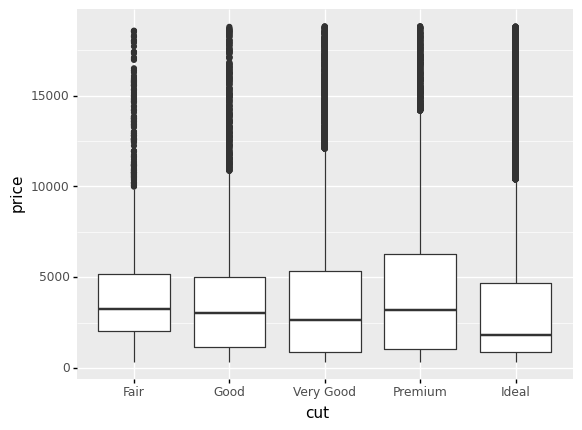

<ggplot: (117249451758)>

In [9]:
# Boxplots 
ggplot(diamonds, aes(x='cut', y='price')) + geom_boxplot()

We can see that as we move to the right the 'cut' becomes ideal but the price drops - paradox

<AxesSubplot:xlabel='cut', ylabel='price'>

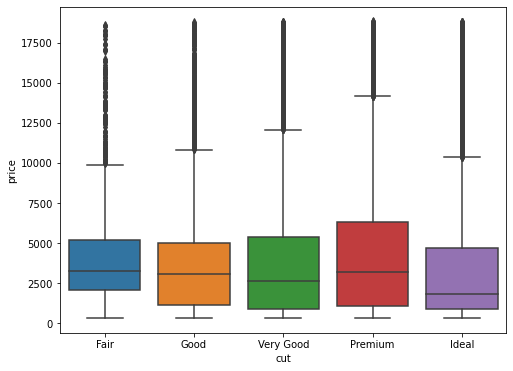

In [12]:
# Seaborn alternative
plt.figure(figsize=(8, 6))
sns.boxplot(x='cut', y='price', data=diamonds)

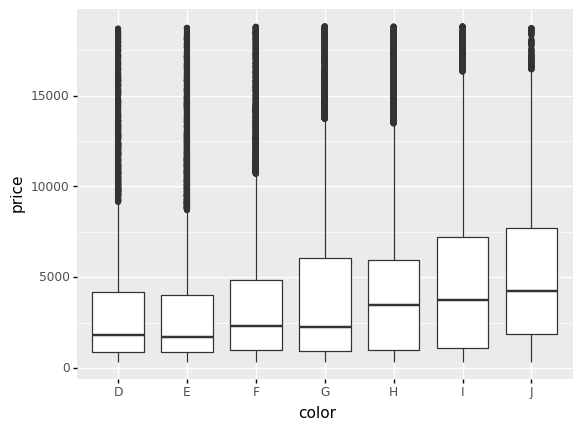

<ggplot: (117250341193)>

In [14]:
# Lets investigate now the clarity on a scale from D to J
ggplot(diamonds, aes(x='color', y='price')) + geom_boxplot()

As we can see that moving from right to left the quality of diamonds drop but price increases - paradox

<AxesSubplot:xlabel='color', ylabel='price'>

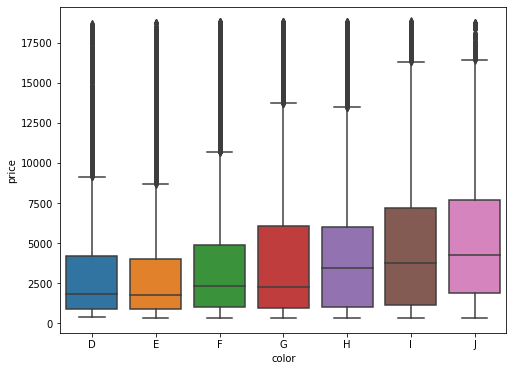

In [15]:
# Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='price', data=diamonds)

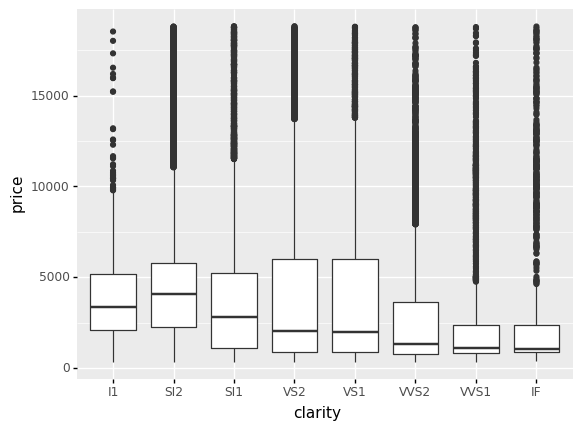

<ggplot: (117250483444)>

In [16]:
# Investiagte clarity - clearence of the diamond
ggplot(diamonds, aes(x='clarity', y='price')) + geom_boxplot()

Clarity increases but price decreases - paradox

<AxesSubplot:xlabel='clarity', ylabel='price'>

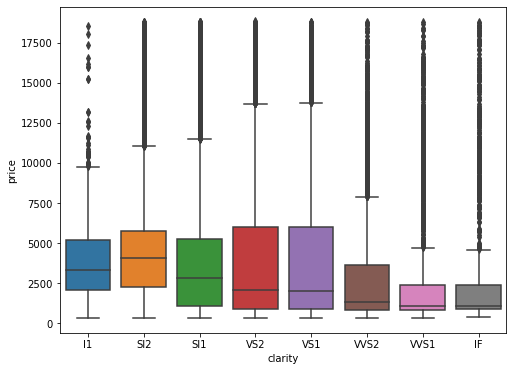

In [17]:
# Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='clarity', y='price', data=diamonds)

We have listed 3 paradox - why is that!

The reason is because we havent considered the weight of the diamonds 'carat' .

This is what we call a confounding factor

We can investigate this relatioship with a hexbin diagram

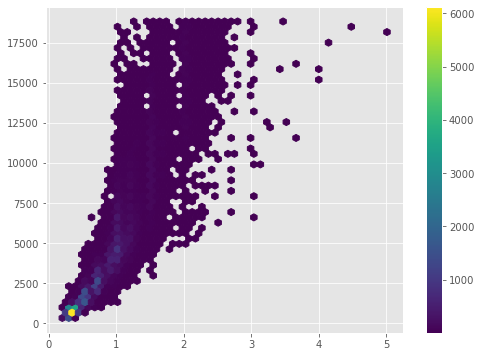

In [18]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds['carat'], y=diamonds['price'], gridsize=50, mincnt=1)
fig.colorbar(hb)

We break up the data into gridsize of 50 and we set them to a partiular color

Most of the diamonds have a carat value of less than 2.5

Bright hex are located on the bottom left

We can also see that the increase factor also replicates a logarithmix graph ( log(x) )

In [19]:
diamonds_log2 = diamonds.query('carat <= 2.5').sort_values(by='carat').copy()
diamonds_log2['price'] = np.log2(diamonds_log2['price'])
diamonds_log2['carat'] = np.log2(diamonds_log2['carat'])

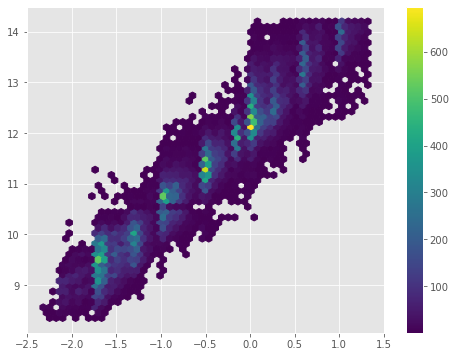

In [20]:
# Logarithmic scale
fig = plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds_log2['carat'], y=diamonds_log2['price'], gridsize=50, mincnt=1)
fig.colorbar(hb)

Hence now since we have a straight line we can use now the data for  linear regression

Lets see the a summary

In [21]:
diamonds_mod = smf.ols("price ~ carat", data=diamonds_log2)
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:44:40   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1939      0.002   6194.469      0.000      12.190      12.198
carat          1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
diamonds_mod = smf.ols("np.log2(price) ~ np.log2(carat)", # we can also set expressions rather that doing the 2 steps above
                       data=diamonds.query('carat <= 2.5'))
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log2(price)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:45:16   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.1939      0.002   6194.469      0.000      12.190      12.198
np.log2(carat)     1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We get this mathematical equation

lg(price)=12,1939+1,6814lg(carat)

price=2^12,1939 x carat^1,6814

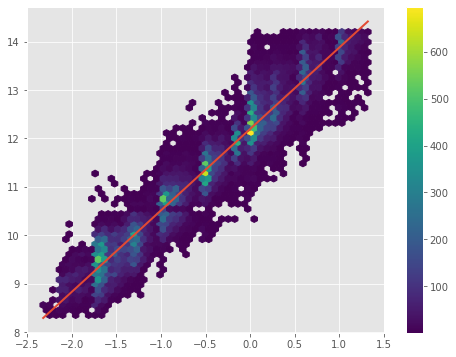

In [24]:
# Setting a regression line
fig = plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds_log2['carat'], y=diamonds_log2['price'], gridsize=50, mincnt=1)
x = diamonds_log2['carat']
y = diamonds_res.params['Intercept'] + diamonds_res.params['np.log2(carat)'] * diamonds_log2['carat']
plt.plot(x, y, linewidth=2)
fig.colorbar(hb)

We can see a perfect straight line that fits perfectly on our data ( high R^2)

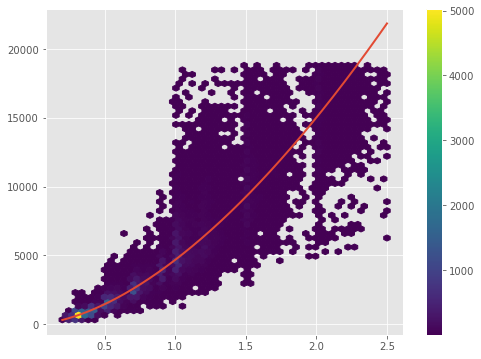

In [25]:
# Removing logarithm
fig = plt.figure(figsize=(8, 6))
x = 2**diamonds_log2['carat']
y = 2**diamonds_log2['price']
hb = plt.hexbin(x=x, y=y, gridsize=50, mincnt=1)
y = 2**(diamonds_res.params['Intercept'] + (diamonds_res.params['np.log2(carat)'] * diamonds_log2['carat']))
plt.plot(x, y, linewidth=2)
fig.colorbar(hb)

We can see that the log(x) fits our data

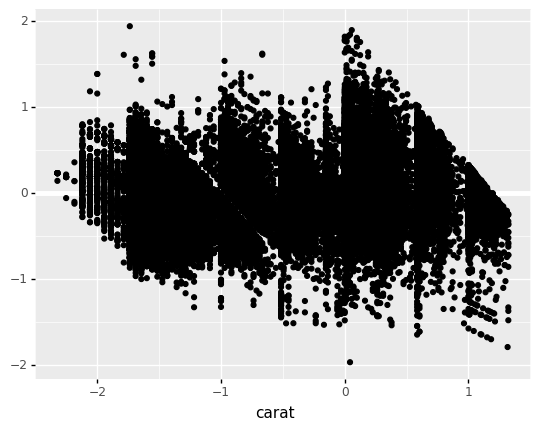

<ggplot: (117251338201)>

In [26]:
# We can check the quality of regression using residuals ggplot

ggplot(data=diamonds_log2) +\
    geom_hline(yintercept=0, color='white', size=2) +\
    geom_point(mapping=aes(x='carat', y=diamonds_res.resid))

<AxesSubplot:xlabel='carat', ylabel='price'>

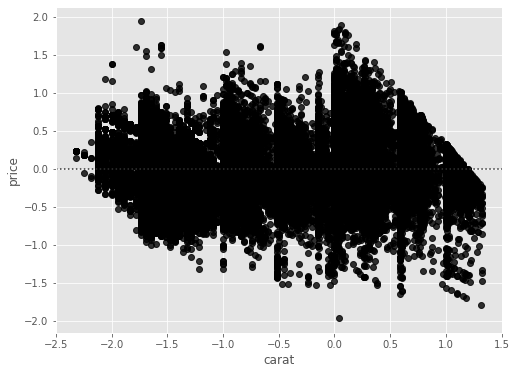

In [27]:
# Seaborn alternative
plt.figure(figsize=(8, 6))
sns.residplot(x='carat', y='price', data=diamonds_log2, color='k')

We have seen the relationship between carat

Lets return to our orignal data

We can create graphs on residuals ( they explain what the independent variable cant - what the weight (carat) cannot explain) )

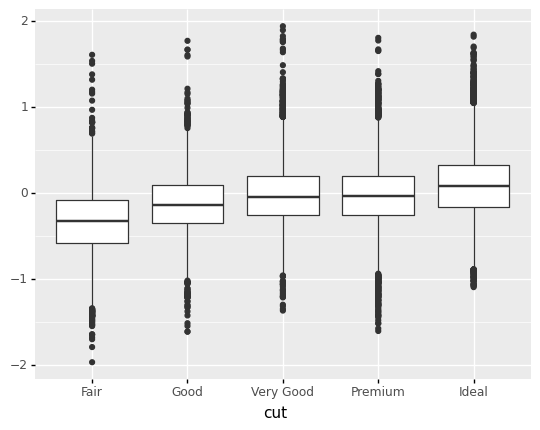

<ggplot: (117251398301)>

In [29]:
ggplot(data=diamonds_log2, mapping=aes('cut', diamonds_res.resid)) + geom_boxplot()

We can see that as we move higher cut we get a higher price - correct

<AxesSubplot:xlabel='cut'>

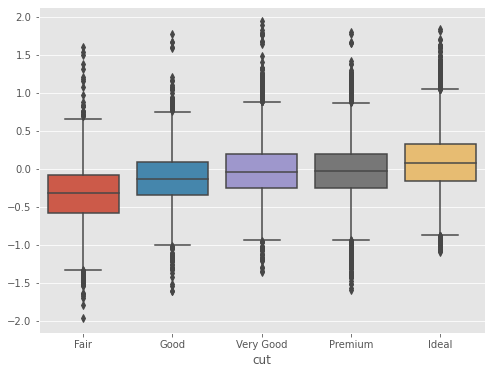

In [30]:
# Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=diamonds_log2['cut'], y=diamonds_res.resid)

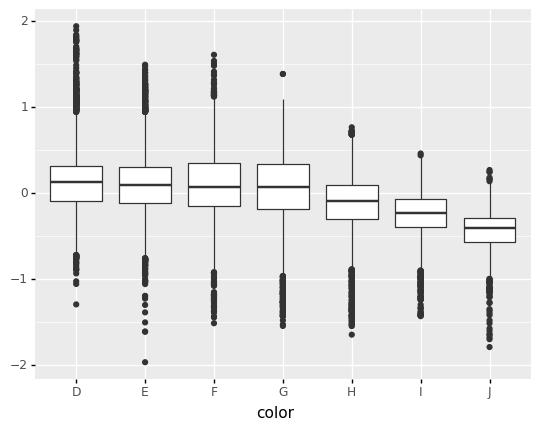

<ggplot: (117255507508)>

In [31]:
# Color

ggplot(data=diamonds_log2, mapping=aes('color', diamonds_res.resid)) + geom_boxplot()

<AxesSubplot:xlabel='color'>

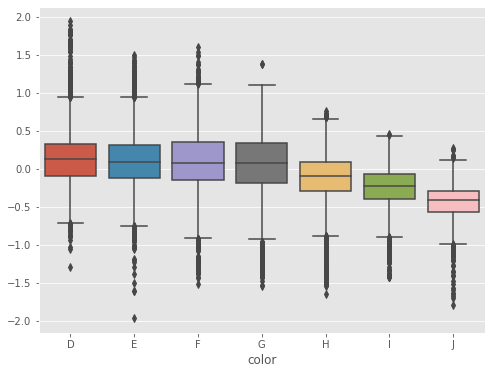

In [32]:
# Seaborn alternative
plt.figure(figsize=(8, 6))
sns.boxplot(x=diamonds_log2['color'], y=diamonds_res.resid)

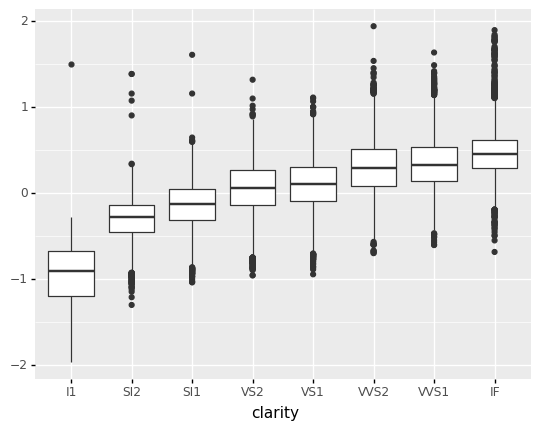

<ggplot: (117255590108)>

In [33]:
# Clarity
ggplot(data=diamonds_log2, mapping=aes('clarity', diamonds_res.resid)) + geom_boxplot()

<AxesSubplot:xlabel='clarity'>

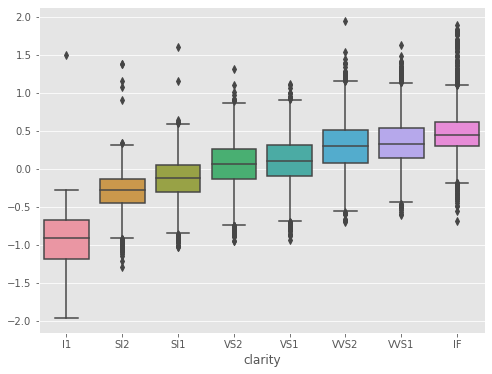

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=diamonds_log2['clarity'], y=diamonds_res.resid)

Using linear regressio we can use the data even though they do not have a linear regression but they can be explained using a mathematical equation

This happens when we use logarithmic scales 

Statsmodel can also include mathematical expressions as well

Need to understand the plot with respect to data